In [23]:
import os
import numpy as np

from nilearn.image import load_img, new_img_like
from nilearn import plotting
from nilearn import datasets


In [6]:
# temp_s3_dir = '/fsx/proj-medarc/fmri/natural-scenes-dataset/temp_s3'
# anat = load_img(f'{temp_s3_dir}/nsddata/ppdata/subj01/anat/T1_0pt8_masked.nii.gz')
#plotting.plot_anat(anat).add_overlay(avg_out_niimg,cmap=plotting.cm.cold_hot,clim=[-3,3])
# plotting.view_img(avg_out_niimg,bg_img=anat)

In [9]:
ls /fsx/jimgoo/data/5-HT_atlas/5-HT1A

5-HT1A.mean.bmax.mrtm2.nopvc.MNI152.sm5.nii.gz
5-HT1A.mean.bmax.mrtm2.nopvc.fsaverage.lh.sm10.nii.gz
5-HT1A.mean.bmax.mrtm2.nopvc.fsaverage.rh.sm10.nii.gz


In [18]:
ht_dir = '/fsx/jimgoo/data/5-HT_atlas/5-HT1A/'

In [19]:
# left and right hemispheres
ht_lr = [
    load_img(os.path.join(ht_dir, '5-HT1A.mean.bmax.mrtm2.nopvc.fsaverage.lh.sm10.nii.gz')),
    load_img(os.path.join(ht_dir, '5-HT1A.mean.bmax.mrtm2.nopvc.fsaverage.rh.sm10.nii.gz')),
]

In [15]:
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

In [16]:
fsaverage

{'area_left': '/admin/home-jimgoo/nilearn_data/fsaverage/area_left.gii.gz',
 'area_right': '/admin/home-jimgoo/nilearn_data/fsaverage/area_right.gii.gz',
 'curv_left': '/admin/home-jimgoo/nilearn_data/fsaverage/curv_left.gii.gz',
 'curv_right': '/admin/home-jimgoo/nilearn_data/fsaverage/curv_right.gii.gz',
 'infl_left': '/admin/home-jimgoo/nilearn_data/fsaverage/infl_left.gii.gz',
 'infl_right': '/admin/home-jimgoo/nilearn_data/fsaverage/infl_right.gii.gz',
 'pial_left': '/admin/home-jimgoo/nilearn_data/fsaverage/pial_left.gii.gz',
 'pial_right': '/admin/home-jimgoo/nilearn_data/fsaverage/pial_right.gii.gz',
 'sphere_left': '/admin/home-jimgoo/nilearn_data/fsaverage/sphere_left.gii.gz',
 'sphere_right': '/admin/home-jimgoo/nilearn_data/fsaverage/sphere_right.gii.gz',
 'sulc_left': '/admin/home-jimgoo/nilearn_data/fsaverage/sulc_left.gii.gz',
 'sulc_right': '/admin/home-jimgoo/nilearn_data/fsaverage/sulc_right.gii.gz',
 'thick_left': '/admin/home-jimgoo/nilearn_data/fsaverage/thick_left

In [30]:
surface_data.get_fdata().shape

(163842, 1, 1, 1)

In [37]:
def plot_receptor_type(type='1A'):
    ht_dir = f'/fsx/jimgoo/data/5-HT_atlas/5-HT{type}'

    ht_lr = [
        load_img(os.path.join(ht_dir, f'5-HT{type}.mean.bmax.mrtm2.nopvc.fsaverage.lh.sm10.nii.gz')),
        load_img(os.path.join(ht_dir, f'5-HT{type}.mean.bmax.mrtm2.nopvc.fsaverage.rh.sm10.nii.gz')),
    ]

    for hemisphere, surface_data in zip(['left','right'], ht_lr):
        plotting.plot_surf(
            surf_mesh=fsaverage['infl_' + hemisphere],
            surf_map=surface_data.get_fdata(),
            bg_map=fsaverage['sulc_' + hemisphere],
            hemi=hemisphere,
            view='lateral',
            threshold=1e-14,
            cmap='cold_hot',
            colorbar=True,
            title=f'5HT-{type} average density, {hemisphere} hemisphere',
            )

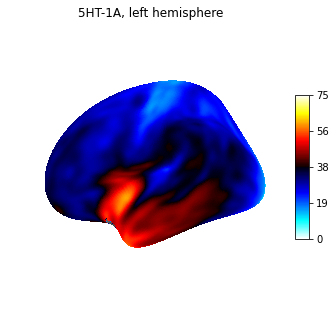

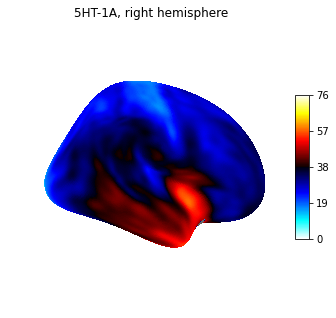

In [36]:
plot_receptor_type('1A')

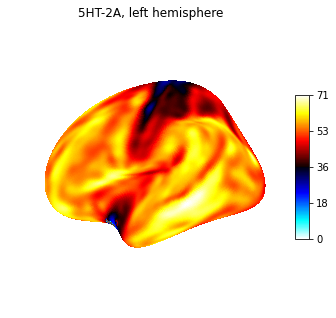

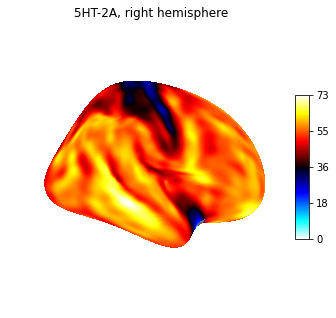

In [35]:
plot_receptor_type('2A')

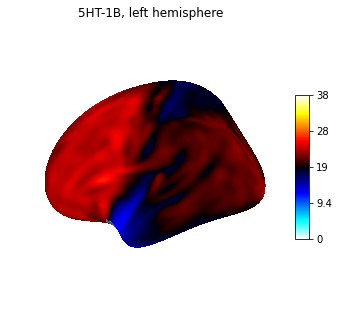

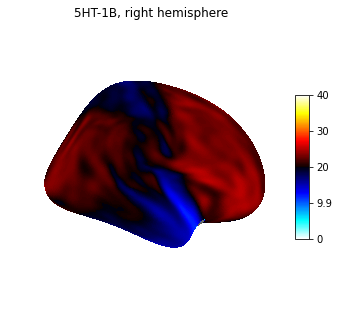

In [34]:
plot_receptor_type('1B')

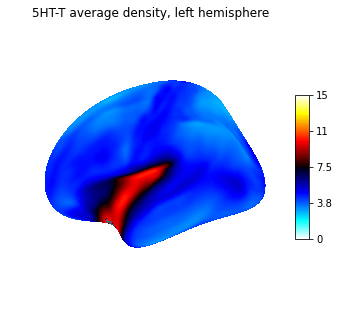

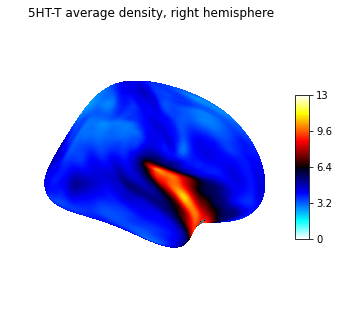

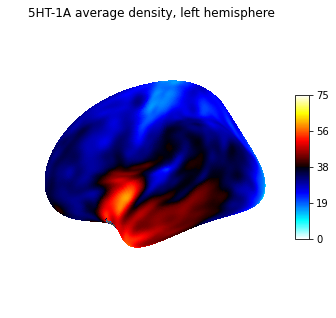

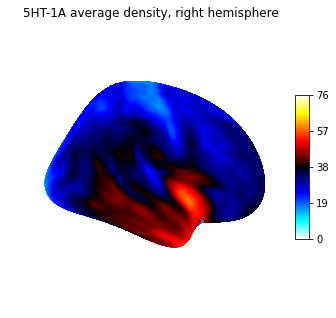

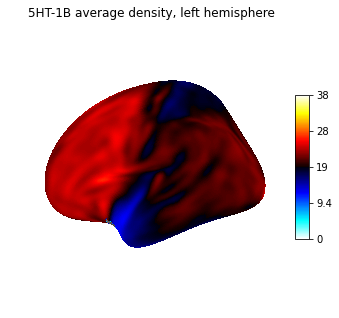

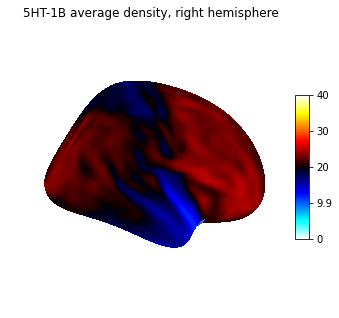

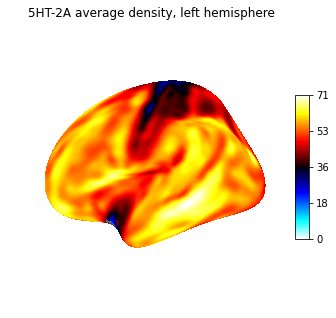

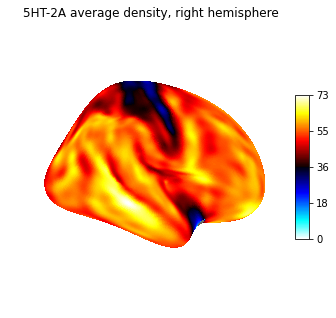

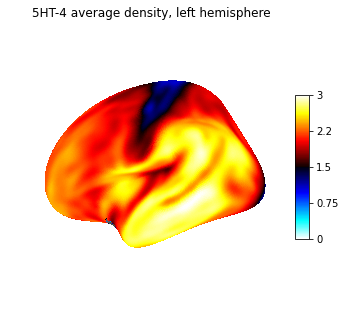

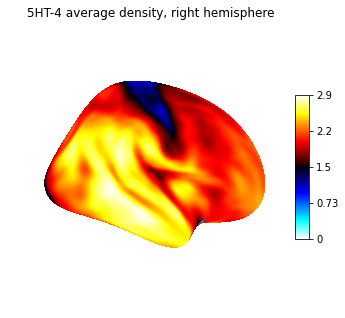

In [38]:
for type in ['T', '1A', '1B', '2A', '4']:
    plot_receptor_type(type)